# Speed Dating Data Exploration

For Capstone we are using the data that was collected from a speed dating event our goal here is to analyze the data, Identify anything that we may find interesting as well as use find any columns that will aid us in predicting future matches for future speed dating events. Originally this project was going to be about creating an algorithm that will identify any anomalies that are detected in the static graphs; however due to the difficulty of the project was well as time we had to change the objective of the project. The objective of the project is to now use the attributes of the speed daters nodes and graph components in order to create predictions 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline
import igraph
from igraph import *
import math
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx


In [16]:
# Use pandas to read the csv file 
df = pd.read_csv('C:/Users/user1/Desktop/speeddating.csv')
df = pd.DataFrame(df)



In [17]:
# Gives us a percentage of the null values that are in our dataset 
df.isnull().sum()/df.shape[0]

iid         0.000000
id          0.000119
gender      0.000000
idg         0.000000
condtn      0.000000
wave        0.000000
round       0.000000
position    0.000000
positin1    0.220339
order       0.000000
partner     0.000000
pid         0.001194
match       0.000000
int_corr    0.018859
samerace    0.000000
age_o       0.012413
race_o      0.008713
pf_o_att    0.010623
pf_o_sin    0.010623
pf_o_int    0.010623
pf_o_fun    0.011697
pf_o_amb    0.012772
pf_o_sha    0.015397
dec_o       0.000000
attr_o      0.025304
sinc_o      0.034256
intel_o     0.036524
fun_o       0.042970
amb_o       0.086178
shar_o      0.128432
              ...   
amb1_3      0.525662
shar1_3     0.525662
attr7_3     0.759370
sinc7_3     0.759370
intel7_3    0.759370
fun7_3      0.759370
amb7_3      0.759370
shar7_3     0.759370
attr4_3     0.646813
sinc4_3     0.646813
intel4_3    0.646813
fun4_3      0.646813
amb4_3      0.646813
shar4_3     0.646813
attr2_3     0.646813
sinc2_3     0.646813
intel2_3    0

# Explore Age 

Age is just a number, this rule will only relate if two people who are dating are over 18. Anyway, the purpose of the of exploring the age is so we may use this attribute as a filter or even a way to use it as an anomaly detector for our capstone.

95
104
0
0


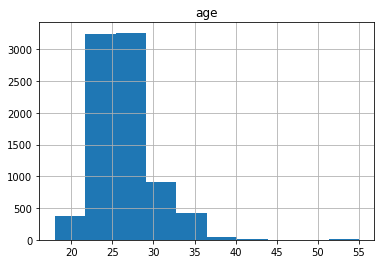

In [30]:
age = df['age']
age_o = df['age_o']

# Check to see the count of the missing data 
print(age.isnull().sum())
print(age_o.isnull().sum())

# Replace the nulls with the mean of the column set 
age_mean = age.mean()
age_omean = age_o.mean()

# Fill the NA with the mean of the age columns 
age=age.fillna(age_mean)
age_o=age_o.fillna(age_omean)

# Check to see the count of the missing data 
print(age.isnull().sum())
print(age_o.isnull().sum())

# Show the distrbution of age in the histogram
df.hist(column='age')

## This is a label to create 1 will represent 1 yes and 0 will represent no 
df['elderly'] = np.where(df['age']>=50, 1, 0) 
df['elderly_o'] = np.where(df['age_o']>=50, 1, 0) 

In [33]:
old_o = df['elderly_o']
old= df['elderly']
# unique subject number, group(wave id gender)
iiD = df['iid']
# Subject within the wave 
pers_id = df['id']
#  partner's iid number 
pid = df['pid']

match = df['match']
part_match = df['dec_o']
# Create a network and display a filtered network where only the elderly are connected and they match
def ElderConnections():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and old[n] ==1 and old_o[n]==1 and match[n]==1 and part_match==1 :
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15) 
    my_graph.show()
        
        
    

In [38]:
# Create a network and display a filtered network where a couple is one old and the other is not and they match 
def ElderConnections2():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and old[n] ==1 and old_o[n]==0 and match[n]==1 and part_match==0 :
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15) 
    my_graph.show()

In [39]:
# Create a network where only the people participating are classified as elderly 
def ElderConnections3():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and old[n] ==1:
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15) 
    my_graph.show()

In [36]:
ElderConnections()

In [37]:
ElderConnections2()

In [40]:
ElderConnections3()

## Explore the Race 
1= African-American/Black<br>
2= Caucasian/White<br>
3= Hispanic/Latino<br>
4=Asian<br>
5= Native American<br>
6=Other<br>

Race is something where we decided that it can have a huge impact on how the speed daters will use as a component in when it comes to deciding if they see the partner as a match or not 

2.0    4727
4.0    1982
3.0     664
6.0     522
1.0     420
0.0      63
dtype: int64


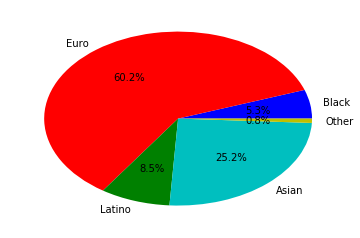

In [21]:
# For every row that has the race identified as nan make it as a 0.
df['race'] = df['race'].replace(np.nan, 0)

# Race of partner 
df ['race_o'] = df['race_o'].replace(np.nan,0)

# Display the race count 
print(pd.value_counts(df['race'].values,))

# Create a pie chart with the races involved in the speed dating event 
labels= ['Black', 'Euro', 'Latino', 'Asian', 'Other']
sizes = [420,4727,664,1982,63]
colors = ['b','r','g','c','y','coral']
plt.pie(sizes,explode=None,labels=labels,autopct='%1.1f%%',colors=colors )
plt.show()

0
0    5062
1    3316
dtype: int64


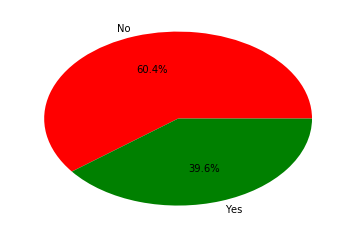

In [22]:
# Race is not correct, its ethnicity 
same_eb = df['samerace']

# Display any count of missing data in gender column 
print(same_eb.isnull().sum())

# No need to fix the same race column due to not having any null values 

# Display the value counts
print(pd.value_counts(same_eb.values,))

label_SameRace = ["No", "Yes"]
sizes = [5062,3316]
colors =["r","g"]
# autopct='%1.1f%%'
plt.pie(sizes,explode=None,labels=label_SameRace,autopct='%1.1f%%',colors=colors )
plt.show()

In [25]:
# Read the data, we are going to use this in order to display a network graph and show any connections with the nodes 
fd = pd.read_csv('C:/Users/user1/Desktop/speeddating.csv')
# unique subject number, group(wave id gender)
iiD = fd['iid']
# Subject within the wave 
pers_id = fd['id']
#  partner's iid number 
pid = fd['pid']
# partner id 
part_id = fd['partner']
# Match as in did the partner like the date
match = fd['match']
#  Did the partner's partner like him/her back? 
part_match = fd['dec_o']
# Categorical attribute, are the two people who are dating in belong to the same race/ ethinic background 
sr = fd['samerace']
# Attraction rating 
partner_rate = fd['attr_o']

partner_rate.fillna(-1,inplace=True)


# Create a function that will gives us a graph of the speed daters that had partners with the same race and they both like each other (match)
def sameraceConnect():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and match[n] == 1 and part_match[n] == 1 and sr[n] == 1:
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15)
    my_graph.show()

In [26]:
sameraceConnect()

In [27]:
#Create a function that will gives us a graph of the speed daters that had partners that match eachother but they belong to a different race 
def diffraceConnect():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and match[n] == 1 and part_match[n] == 1 and sr[n] == 0:
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15)
    my_graph.show()

In [28]:
diffraceConnect()

## Explore Gender 

0


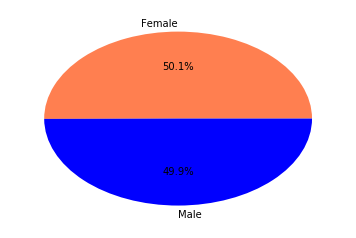

In [41]:
gender = df['gender']

# Display any count of missing data in gender column 
print(gender.isnull().sum())

# 1 is female, 0 is male

objg = ["Female", "Male"]
sizes=[4194,4184]
color = ["coral","b"]
plt.pie(sizes,explode=None,labels=objg,autopct='%1.1f%%',colors=color )
plt.show()

## Explore the Attractive levels 

For every row we get the two subjects, the person in the round and the person's partner in the round, after having a date session they are asked to give a scale from 0 to 10, 0 being the lowest score and the highest score being 10, this plays a major role for if the two partners have the same high scoring rate then it's most likely that they will be together or would at least like to try to date each other  

 6.0     1658
 7.0     1646
 5.0     1260
 8.0     1231
 4.0      749
 9.0      540
 3.0      390
 10.0     325
 2.0      244
-1.0      202
 1.0      109
 0.0        8
 6.5        7
 7.5        3
 9.5        3
 3.5        1
 9.9        1
 8.5        1
dtype: int64
 6.0     1655
 7.0     1642
 5.0     1260
 8.0     1230
 4.0      748
 9.0      540
 3.0      390
 10.0     324
 2.0      244
-1.0      212
 1.0      108
 0.0        8
 6.5        7
 7.5        3
 9.5        3
 3.5        1
 9.9        1
 8.5        1
 10.5       1
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B157CFBF28>]],
      dtype=object)

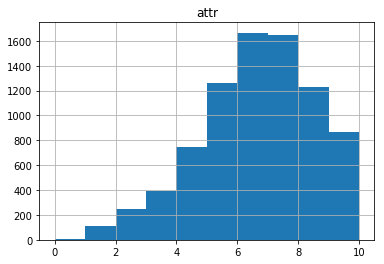

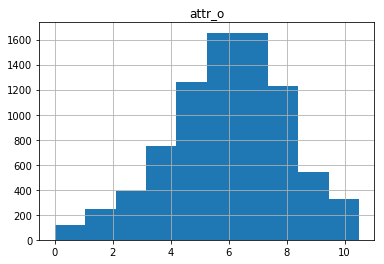

In [43]:
# Rating of the participant gives to his/her partner 
attr = df['attr']

# Rating of the participant's partner gave to the participant
attro = df['attr_o']

# Eliminate the empty values, since we can't use 0 since it's a rating we will change it to -1 as 
# a way to identify that the rating was unapplicable (nans messes with data sets ) but not values such as -1

attr = attr.replace(np.nan, -1)
attro = attro.replace(np.nan, -1)


# Display the value counts of the ratings of the participants and the partner 
print(pd.value_counts(attr.values,))
print(pd.value_counts(attro.values,))

# Plot the Histogram of how the person rated his/ her date's attractivce level 
df.hist(column = 'attr')

# Plot the Histogram of how the person rated his/ her date's attractivce level 
df.hist(column = 'attr_o')

In [51]:
def attr_Levels():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and attr[n]>= 7 and attro[n]>=7:
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15)
    my_graph.show()

In [52]:
attr_Levels()

## Religion Importance
 This is a strange factor to use when it comes to deterimining if the speed daters will match or not; however this may be an interesting factor to use when it comes to determining the possibility of the speed daters matching together

[ 4.  5.  1.  3.  2.  8. 10.  6.  0.  7.  9.]
1.0     3032
3.0      929
2.0      863
5.0      697
6.0      661
4.0      524
8.0      517
7.0      467
10.0     327
9.0      282
0.0       79
dtype: int64


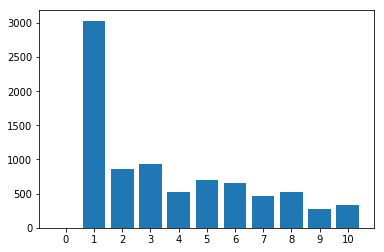

In [53]:
relig = df['imprelig']

# Replace the nan with 0 we can use 0 to interpret as unkown or not applicable.
relig = relig.replace(np.nan,0)

print(relig.unique())
objr = ('0','1','2','3','4','5','6','7','8','9','10')
y_posr = np.arange(len(objr))
freq_relig =[0,3032,863,929,524,697,661,467,517,282,327]

print(pd.value_counts(relig.values))

# Display the graph of how much religon matterred in finding a match 
plt.bar(y_posr, freq_relig, align='center', alpha=1)
plt.xticks(y_posr, objr)
plt.show()


Judging by the bar graph displayed by the speed dating data set the importance of religion doesn't really matter; however there are a decent number of people who  believe that religion is important when it comes to finding a partner

In [68]:
# Display network graphs that shows the connections where the importance of religion is at least 7 and that they matched with somebody 
def religionConnections():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and relig[n] >=7 and match[n]==1 and part_match[n]==1 :
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15) 
    my_graph.show()
        
        
    

In [72]:
religionConnections()

0    6998
1    1380
dtype: int64


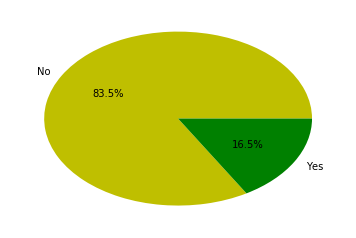

In [62]:
# Display the The counts of yes it's a match and no not a match 
print(pd.value_counts(match.values,))

# 1 is female, 0 is male

objm = ["No", "Yes"]
sizes=[6998,1380]
color = ["y","g"]
plt.pie(sizes,explode=None,labels=objm,autopct='%1.1f%%',colors=color )
plt.show()

In [66]:
def matchesgraph():
    gr=Graph()
    gr.add_vertices(iiD.nunique())
    gr.vs["person"] = iiD.unique()
    for n in range(0,iiD.size):
        if not math.isnan(iiD[n]) and not math.isnan(pid[n]):
            curriiD=iiD[n]-1
            currpid= int(pid[n])-1
            if iiD[n]>117:
                curriiD = curriiD - 1
            if pid[n]>117:
                currpid = currpid-1
            if gr.get_eid(curriiD, currpid, directed=False, error=False) == -1 and part_match[n] ==1 and match[n]==1 :
                gr.add_edges([(curriiD, currpid)])
    gr.vs["label"] = gr.vs["person"]
    lout =  gr.layout("kk")
    cmty = gr.community_multilevel()
    my_graph= plot(cmty, layout=lout, bbox=(3000,3000), mark_groups=True, vertex_size=30, vertex_label_size=15) 
    my_graph.show()
    

In [67]:
matchesgraph()

In [71]:
income = df['income']